MOVIE RECOMMENDATION SYSTEM - 

Dataset Link - https://drive.google.com/file/d/1cCkwiVv4mgfl20ntgY3n4yApcWqqZQe6/view



WORKFLOW OF THE PROJECT : 

1. Data Collection
2. Importing the required libraries
3. Importing the collected data into the workspace
4. Data Preprocessing and visualization
5. Selecting the features for building the recommendation system
6. Converting the text data to feature vectors
7. Getting the similarity scores using cosine similarity

In [1]:
#importing the required libraries for the task
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

Importing the collected data into the workspace

In [ ]:
data = pd.read_csv('movies.csv')
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Machine Learning with Python\\MOVIE RECOMMENDATION SYSTEM FOR SEMINAR - I\\movies.csv'

In [ ]:
#let's see the names of the columns present in the dataset
data.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [ ]:
data.shape

(4803, 24)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [ ]:
data.isnull().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

In [ ]:
data.drop(['homepage'],axis=1,inplace=True)

In [ ]:
data.head()

,index,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


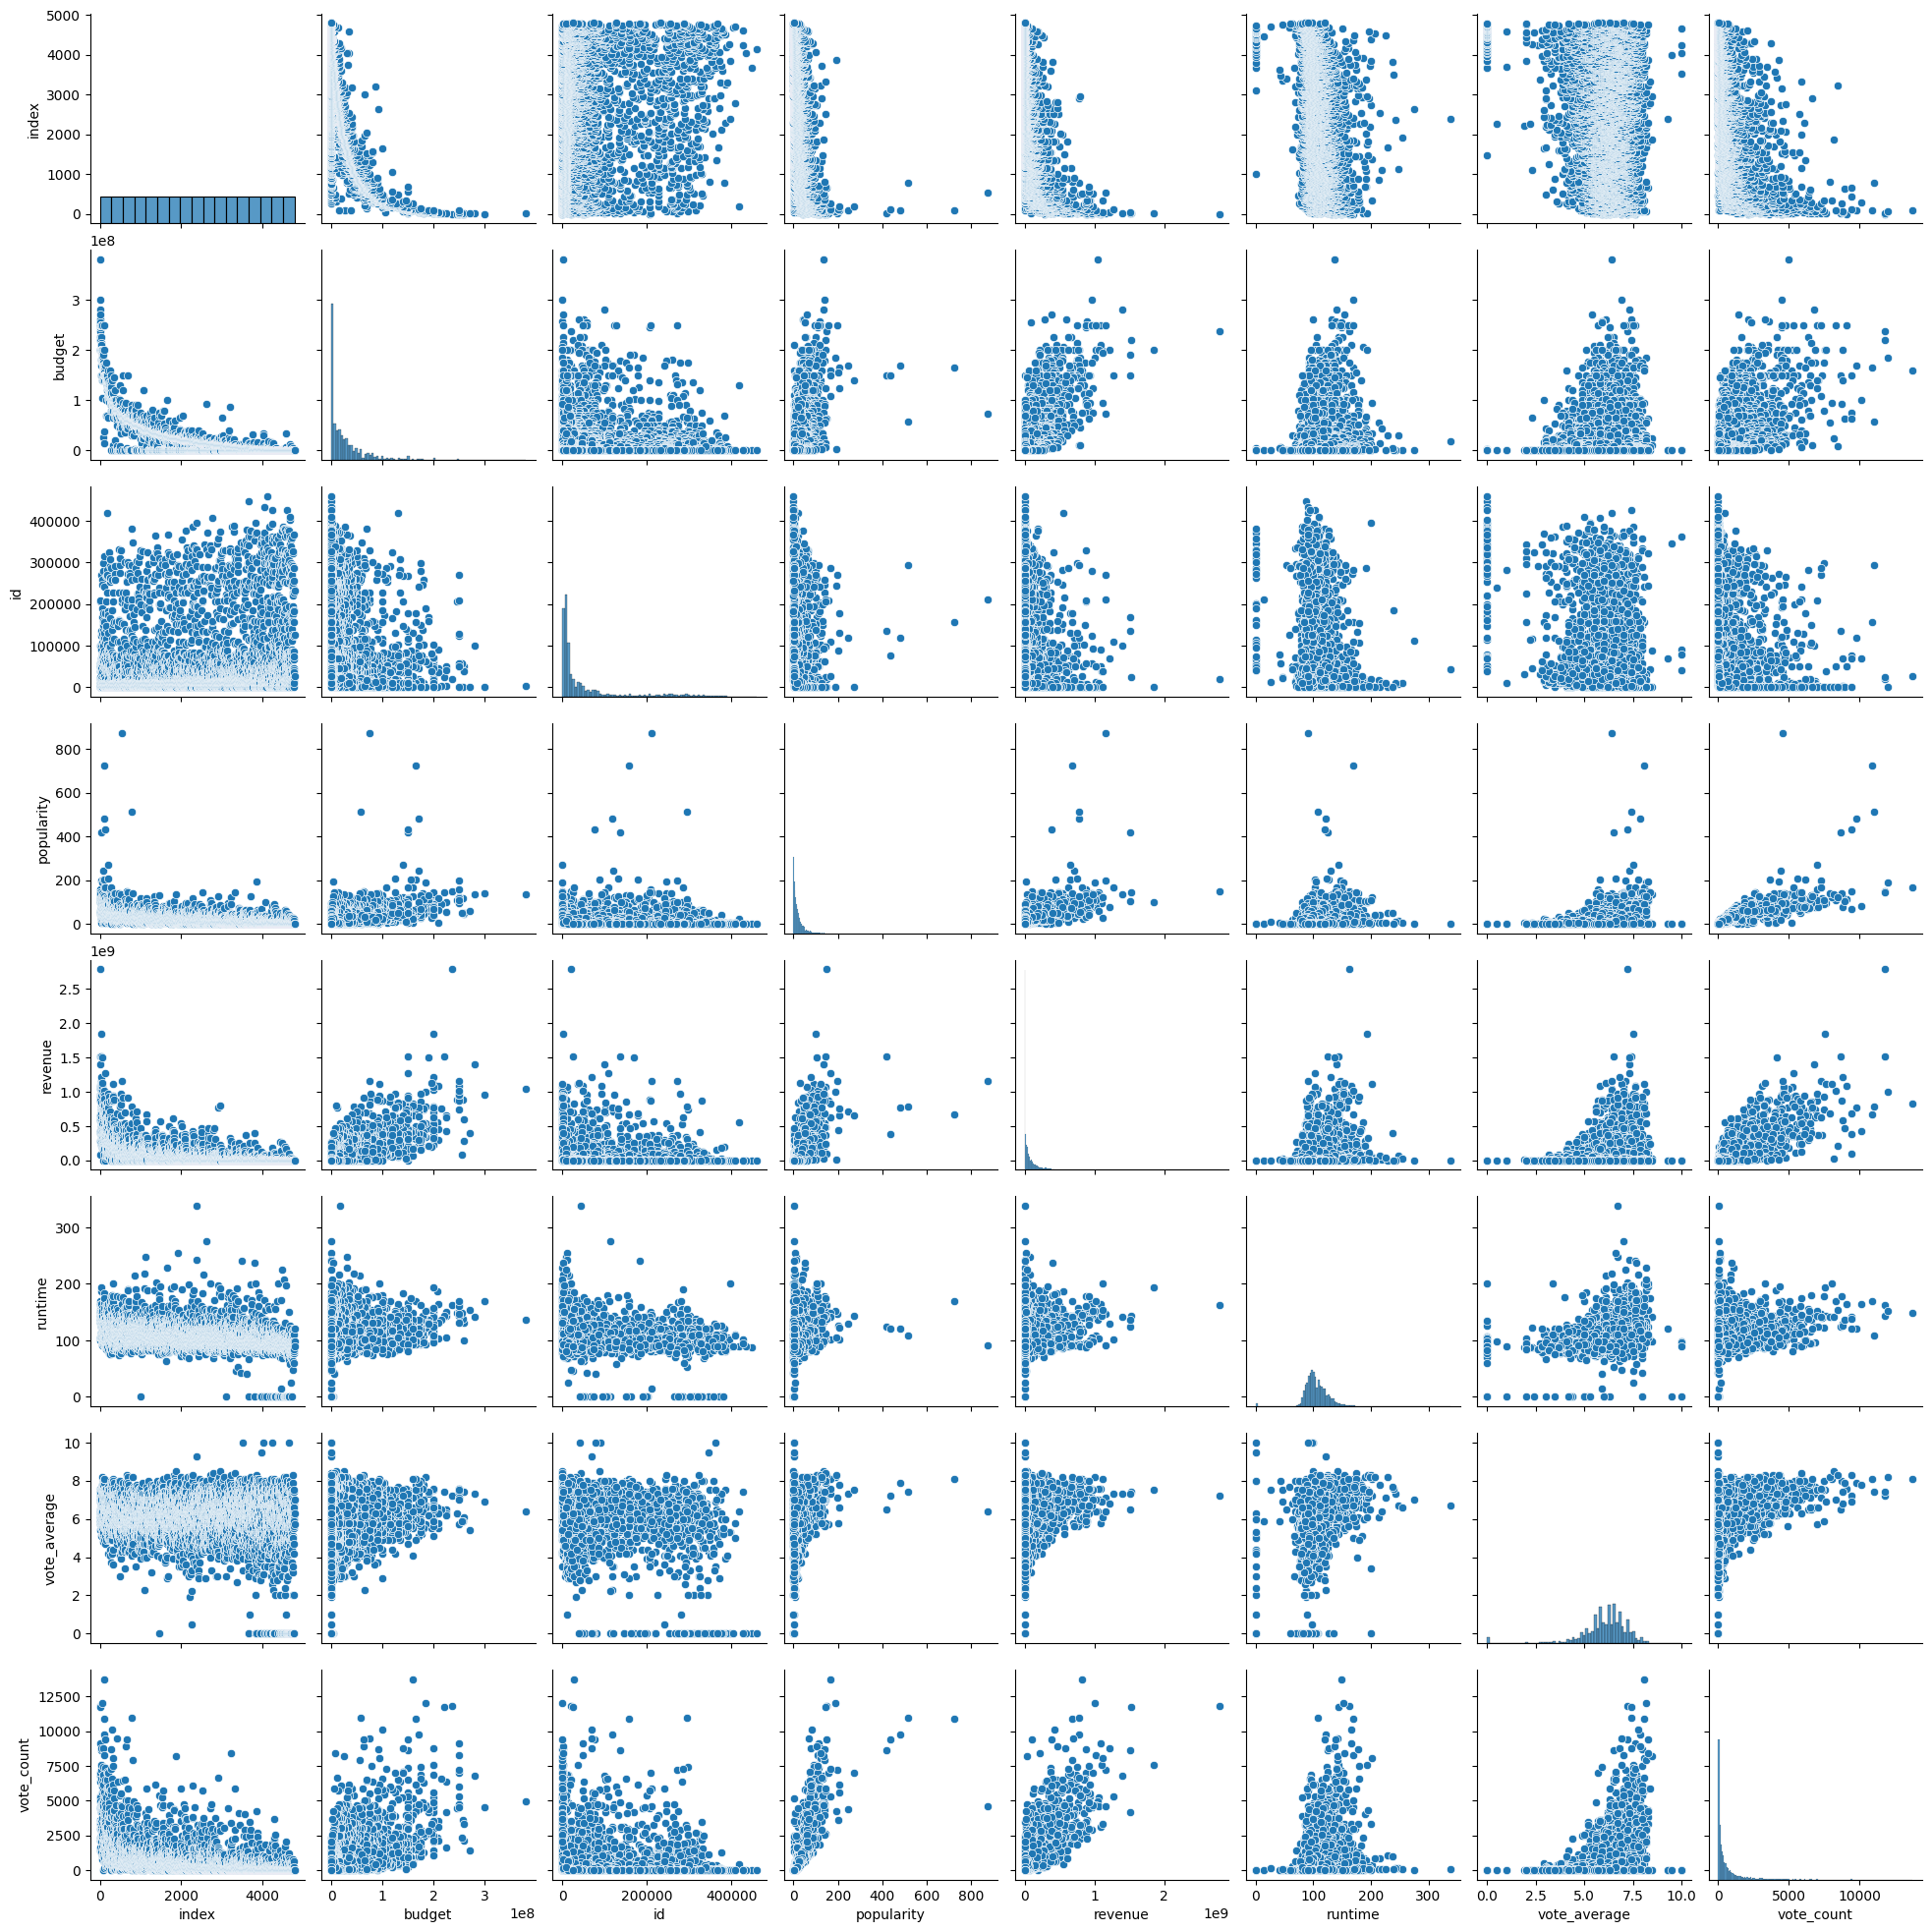

In [ ]:
sns.pairplot(data)

In [ ]:
#selecting relevant features from the dataframe
selecting_features = ['genres','keywords','tagline','cast','director']
print(selecting_features)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [ ]:
#replacing all the null values with null strings

for feature in selecting_features:
    data[feature] = data[feature].fillna('')
    

In [ ]:
#combining all the 5 features extracted from the dataset 
combine_feat = data['genres']+' '+data['keywords']+' '+data['tagline']+' '+data['cast']+' '+data['director']

In [ ]:
print(combine_feat)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


In [ ]:
# converting the text data to feature vectors

vectorizer = TfidfVectorizer()

In [ ]:
feature_vectors = vectorizer.fit_transform(combine_feat)

In [ ]:
print(feature_vectors)

  (0, 2432)	0.17272411194153
  (0, 7755)	0.1128035714854756
  (0, 13024)	0.1942362060108871
  (0, 10229)	0.16058685400095302
  (0, 8756)	0.22709015857011816
  (0, 14608)	0.15150672398763912
  (0, 16668)	0.19843263965100372
  (0, 14064)	0.20596090415084142
  (0, 13319)	0.2177470539412484
  (0, 17290)	0.20197912553916567
  (0, 17007)	0.23643326319898797
  (0, 13349)	0.15021264094167086
  (0, 11503)	0.27211310056983656
  (0, 11192)	0.09049319826481456
  (0, 16998)	0.1282126322850579
  (0, 15261)	0.07095833561276566
  (0, 4945)	0.24025852494110758
  (0, 14271)	0.21392179219912877
  (0, 3225)	0.24960162956997736
  (0, 16587)	0.12549432354918996
  (0, 14378)	0.33962752210959823
  (0, 5836)	0.1646750903586285
  (0, 3065)	0.22208377802661425
  (0, 3678)	0.21392179219912877
  (0, 5437)	0.1036413987316636
  :	:
  (4801, 17266)	0.2886098184932947
  (4801, 4835)	0.24713765026963996
  (4801, 403)	0.17727585190343226
  (4801, 6935)	0.2886098184932947
  (4801, 11663)	0.21557500762727902
  (4801, 1672

COSINE SIMILARITY

In [ ]:
 #getting the similarity scores using cosine similarity

similarity = cosine_similarity(feature_vectors)

In [ ]:
print(similarity)

[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


In [ ]:
print(similarity.shape)

(4803, 4803)


GETTING THE MOVIE NAME FROM USER

In [ ]:
# getting the movie name from the user

movie_name = input(' Enter your favourite movie name : ')

In [ ]:
# creating a list with all the movie names given in the dataset

list_of_all_titles = data['title'].tolist()
print(list_of_all_titles)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [ ]:
# finding the close match for the movie name given by the user

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
print(find_close_match)

['Spider-Man', 'Superman', 'Spider']


In [ ]:
close_match = find_close_match[0]
print(close_match)

Spider-Man


In [ ]:
# finding the index of the movie with title

index_of_the_movie = data[data.title == close_match]['index'].values[0]
print(index_of_the_movie)

159


In [ ]:
# getting a list of similar movies

similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)

[(0, 0.05803347266824191), (1, 0.028510860472594192), (2, 0.027527242422615502), (3, 0.006457320533567938), (4, 0.07910312941508459), (5, 0.3188331558421017), (6, 0.0), (7, 0.005837358717098843), (8, 0.01984856933034166), (9, 0.017094559158687336), (10, 0.03289500092097852), (11, 0.00513746235036844), (12, 0.017699463936031615), (13, 0.016312073634578168), (14, 0.017221598804829895), (15, 0.011028690492438575), (16, 0.0055350569108376544), (17, 0.016931592006051974), (18, 0.005525360643470355), (19, 0.021680168394872627), (20, 0.04593061379094501), (21, 0.004853496672605501), (22, 0.017356132823837148), (23, 0.028252755876041348), (24, 0.01268769144627989), (25, 0.011992878106901545), (26, 0.006024661849598387), (27, 0.005268179012698267), (28, 0.005783838859717594), (29, 0.028149881853568752), (30, 0.3179190198222972), (31, 0.03510954856669071), (32, 0.021374196216168765), (33, 0.005801089457404634), (34, 0.0), (35, 0.006089692551768507), (36, 0.005487298957648992), (37, 0.13254335177

In [ ]:
len(similarity_score)

4803

In [ ]:
# sorting the movies based on their similarity score

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 
print(sorted_similar_movies)

[(159, 1.0000000000000004), (5, 0.3188331558421017), (30, 0.3179190198222972), (1559, 0.1828131277152563), (382, 0.16501718739122473), (3575, 0.16167041055131565), (2361, 0.13913552967690979), (37, 0.13254335177245744), (1364, 0.1315753447298594), (1193, 0.1282353330125354), (1793, 0.12355727076460596), (328, 0.12188313538843792), (677, 0.11987005023906432), (1796, 0.11833294042448737), (1523, 0.11678331012908381), (1598, 0.114546607093097), (4441, 0.11278570204538363), (2529, 0.10580630139750406), (4427, 0.10339492817261244), (976, 0.10254994461653799), (2157, 0.10224484429143274), (978, 0.1010166095053646), (2369, 0.09964302137705913), (1435, 0.09844672492278542), (448, 0.09796336022022192), (1533, 0.09756374595438326), (2060, 0.09746246263620428), (2201, 0.09721199893417153), (2980, 0.09682299898140828), (2763, 0.09599045327407793), (3077, 0.09545910274922952), (3155, 0.09513620988808803), (3046, 0.09500017389530692), (2592, 0.09458996594241367), (1239, 0.09280098679642097), (3188, 

In [ ]:
# print the name of similar movies based on the index

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = data[data.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

Movies suggested for you : 

1 . Spider-Man
2 . Spider-Man 3
3 . Spider-Man 2
4 . The Notebook
5 . Seabiscuit
6 . Clerks II
7 . The Ice Storm
8 . Oz: The Great and Powerful
9 . Horrible Bosses
10 . The Count of Monte Cristo
11 . In Good Company
12 . Finding Nemo
13 . Clear and Present Danger
14 . Brothers
15 . The Good German
16 . Drag Me to Hell
17 . Bambi
18 . The Queen
19 . Charly
20 . Escape from L.A.
21 . Daybreakers
22 . The Life Aquatic with Steve Zissou
23 . Labor Day
24 . Wimbledon
25 . Cold Mountain
26 . Hearts in Atlantis
27 . Out of the Furnace
28 . Bullets Over Broadway
29 . The Purge: Election Year


THE MOVIE RECOMMENDER SYSTEM

In [ ]:
#the complete movie recommender system
movie_name = input(' Enter your favourite movie name : ')

list_of_all_titles = data['title'].tolist()

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

close_match = find_close_match[0]

index_of_the_movie = data[data.title == close_match]['index'].values[0]

similarity_score = list(enumerate(similarity[index_of_the_movie]))

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = data[data.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

Movies suggested for you : 

1 . Batman
2 . Batman Returns
3 . Batman & Robin
4 . The Dark Knight Rises
5 . Batman Begins
6 . The Dark Knight
7 . A History of Violence
8 . Superman
9 . Beetlejuice
10 . Bedazzled
11 . Mars Attacks!
12 . The Sentinel
13 . Planet of the Apes
14 . Man of Steel
15 . Suicide Squad
16 . The Mask
17 . Salton Sea
18 . Spider-Man 3
19 . The Postman Always Rings Twice
20 . Hang 'em High
21 . Spider-Man 2
22 . Dungeons & Dragons: Wrath of the Dragon God
23 . Superman Returns
24 . Jonah Hex
25 . Exorcist II: The Heretic
26 . Superman II
27 . Green Lantern
28 . Superman III
29 . Something's Gotta Give
